# Preliminary Data Analysis

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

In [33]:
pd.set_option('display.max_rows',100)

# Importing Data

Dataset for socially rented dwelling by Local Authority, 1992-2021

In [48]:
df1 = pd.read_excel('Socially Rented Dwellings by LA, 1992-2021.xlsx')
df1.rename(columns={'new_dwellings':'SR'}, inplace=True)
df1.drop(columns='Unnamed: 0',inplace=True)
print(df1.shape)
df1.head()

(12000, 4)


,LA_code,LA,year,SR
0,E07000157,Alnwick,1992,44.0
1,E07000158,Berwick-upon-Tweed,1992,5.0
2,E07000159,Blyth Valley,1992,16.0
3,E07000160,Castle Morpeth,1992,8.0
4,E07000054,Chester-le-Street,1992,0.0


Dataset for total number of affordable dwellings by LA, 1992-2021

In [49]:
df2 = pd.read_excel('Total Affordable Rent Dwellings by LA, 1992-2021.xlsx')
df2.drop(columns='Unnamed: 0', inplace=True)
df2.rename(columns={'new_dwellings':'AR'}, inplace=True)
print(df2.shape)
df2.head()

(12000, 4)


,LA_code,LA,year,AR
0,E07000157,Alnwick,1992,45.0
1,E07000158,Berwick-upon-Tweed,1992,5.0
2,E07000159,Blyth Valley,1992,21.0
3,E07000160,Castle Morpeth,1992,8.0
4,E07000054,Chester-le-Street,1992,16.0


Total number of dwellings completed by Local Authority, 1980-2021

In [51]:
df3 = pd.read_excel('Net Dwellings by LA, 2001-2021.xlsx')
df3.drop(columns='Unnamed: 0',inplace=True)
df3.rename(columns={'net dwellings':'DC_Total'},inplace=True)

In [52]:
df3[df3.loc[:,'LA']=='Coventry']

,LA_code,LA,year,DC_Total,date
117,E08000026,Coventry,2002,566,2002-01-01
487,E08000026,Coventry,2003,624,2003-01-01
857,E08000026,Coventry,2004,-8,2004-01-01
1227,E08000026,Coventry,2005,308,2005-01-01
1597,E08000026,Coventry,2006,631,2006-01-01
1967,E08000026,Coventry,2007,918,2007-01-01
2337,E08000026,Coventry,2008,1133,2008-01-01
2707,E08000026,Coventry,2009,710,2009-01-01
3077,E08000026,Coventry,2010,794,2010-01-01
3447,E08000026,Coventry,2011,759,2011-01-01


Importing data for median house price in UK by Local Authority, 1995-2021

In [53]:
df4 = pd.read_excel('Median House Prices by LA 1995-2021, Quarterly, Long.xlsx')


In [54]:
df4['quarter'] = df4['quarter'].map(lambda x: ''.join(x.split()))

In [55]:
df4 = df4.loc[df4.quarter!='...109',:]

In [56]:
df4['date'] = pd.to_datetime(df4['quarter'],format='%b%Y')

Merging all datasets into one

In [57]:
df = pd.merge(df1,df2,on=['LA_code','LA','year'])
df = pd.merge(df,df3,on=['LA_code','LA','year'])
df.loc[:,'date'] = pd.to_datetime(df.loc[:,'year'].astype(str),format='%Y')
df.loc[df.DC_Total=='..','DC_Total'] = np.nan
df.loc[:,'DC_Total'] = df.loc[:,'DC_Total'].astype(float)

In [58]:
df.head()

,LA_code,LA,year,SR,AR,DC_Total,date
0,E07000157,Alnwick,2002,22.0,22.0,117.494232,2002-01-01
1,E07000158,Berwick-upon-Tweed,2002,5.0,5.0,61.992821,2002-01-01
2,E07000159,Blyth Valley,2002,0.0,0.0,242.695102,2002-01-01
3,E07000160,Castle Morpeth,2002,6.0,6.0,163.044925,2002-01-01
4,E07000054,Chester-le-Street,2002,0.0,12.0,163.789940,2002-01-01


In [59]:
df.shape

(6180, 7)

Extracting data for Coventry alone

In [60]:
dcov = df[df.loc[:,'LA']=='Coventry'].copy()
dcov.head()

,LA_code,LA,year,SR,AR,DC_Total,date
113,E08000026,Coventry,2002,76.0,140.0,566.0,2002-01-01
422,E08000026,Coventry,2003,218.0,320.0,624.0,2003-01-01
731,E08000026,Coventry,2004,98.0,111.0,-8.0,2004-01-01
1040,E08000026,Coventry,2005,131.0,174.0,308.0,2005-01-01
1349,E08000026,Coventry,2006,122.0,172.0,631.0,2006-01-01


In [61]:
dcov.reset_index(drop=True,inplace=True)

Adding columns for socially rented homes as a percentage of total affordable homes and afforable homes as a percentage of total dwellings

In [75]:
dcov['SR_p'] = (dcov['SR']/dcov['AR'])*100
dcov['AR_p'] = (dcov['AR']/dcov['DC_Total'])*100
dcov.loc[2,'AR_p'] = 0
dcov.loc[2,'SR_p'] = 0

Importing data for population estimates

In [64]:
dpop = pd.read_excel('Population by LA, 2001-2020.xlsx')
dpop.drop(columns=['Unnamed: 0'],inplace=True)
dpop.head()

,LA_code,LA,year,population,date
0,E06000001,Hartlepool,2001,90152,2001-01-01
1,E06000002,Middlesbrough,2001,141233,2001-01-01
2,E06000003,Redcar and Cleveland,2001,139159,2001-01-01
3,E06000004,Stockton-on-Tees,2001,183795,2001-01-01
4,E06000005,Darlington,2001,97894,2001-01-01


Extracting population data for coventry alone

In [65]:
dcov_pop = dpop[dpop.loc[:,'LA']=='Coventry'].copy()
dcov_pop.reset_index(drop=True,inplace=True)
dcov_pop.head()

,LA_code,LA,year,population,date
0,E08000026,Coventry,2001,302804,2001-01-01
1,E08000026,Coventry,2002,301295,2002-01-01
2,E08000026,Coventry,2003,300665,2003-01-01
3,E08000026,Coventry,2004,298174,2004-01-01
4,E08000026,Coventry,2005,298386,2005-01-01


Calculating population change per year


In [66]:
for x in dcov_pop.index[1:]:
    dcov_pop.loc[x,'pchange'] = dcov_pop.loc[x,'population'] - dcov_pop.loc[x-1,'population']

dcov_pop.head()

,LA_code,LA,year,population,date,pchange
0,E08000026,Coventry,2001,302804,2001-01-01,NaN
1,E08000026,Coventry,2002,301295,2002-01-01,-1509.0
2,E08000026,Coventry,2003,300665,2003-01-01,-630.0
3,E08000026,Coventry,2004,298174,2004-01-01,-2491.0
4,E08000026,Coventry,2005,298386,2005-01-01,212.0


# Visualisation

Plotting socially rented and affordable dwellings against total housing in Coventry, red line denotes housing need as assessed in Local Plan 2017 Housing SPD.

In [67]:
dt = df[['LA_code','LA','SR','AR','DC_Total','date']].groupby(['date']).mean()
# what about missing values?

Getting total affordable homes as a percentage of all dwellings for all LAs

In [72]:
dt['AR_p'] = dt['AR']/dt['DC_Total']*100

Comparing Coventry's provision of affordable housing to rest of UK

In [76]:
x = dt.index
y1 = dt['SR']
y2 = dt['AR_p']
y3 = dcov['SR']
y4 = dcov['AR_p']

Text(0.5, 1.0, 'Coventry Affordable Home Delivery v. National Average')

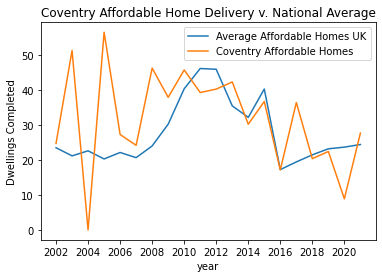

In [77]:
#plt.plot(x,y1)
plt.plot(x,y2)
#plt.plot(x,y3)
plt.plot(x,y4)
plt.legend(['Average Affordable Homes UK','Coventry Affordable Homes'])
plt.xlabel('year')
plt.ylabel('Dwellings Completed')
plt.title('Coventry Affordable Home Delivery v. National Average')


Coventry is above the mean for affordable house delivery, but does not follow the recent trend of increasing affordable homes delivery.

Looking at relationship between house prices and housing supply. We compare changes in the median house price in Coventry with annual delivery of homes

In [78]:
dcov4 = df4[df4.loc[:,'LA']=='Coventry'].copy()
dcov4.reset_index(drop=True,inplace=True)
dcov4['year'] = dcov4['date'].dt.year

In [79]:
for x in dcov4.index[1:]:
    dcov4.loc[x,'price_change'] = dcov4.loc[x,'median'] - dcov4.loc[x-1,'median']

Lagged price change by 4 quarters

In [80]:
for x in dcov4.index[4:]:
    dcov4.loc[x,'price_change_4'] = dcov4.loc[x-4,'price_change']

In [81]:
dcov4.head()

,LA_code,LA,quarter,median,date,year,price_change,price_change_4
0,E08000026,Coventry,Dec1995,42000.0,1995-12-01,1995,NaN,NaN
1,E08000026,Coventry,Mar1996,41500.0,1996-03-01,1996,-500.0,NaN
2,E08000026,Coventry,Jun1996,41500.0,1996-06-01,1996,0.0,NaN
3,E08000026,Coventry,Sep1996,42000.0,1996-09-01,1996,500.0,NaN
4,E08000026,Coventry,Dec1996,42000.0,1996-12-01,1996,0.0,NaN


In [82]:
dcov

,LA_code,LA,year,SR,AR,DC_Total,date,SR_p,AR_p
0,E08000026,Coventry,2002,76.0,140.0,566.0,2002-01-01,54.285714,24.734982
1,E08000026,Coventry,2003,218.0,320.0,624.0,2003-01-01,68.125000,51.282051
2,E08000026,Coventry,2004,98.0,111.0,-8.0,2004-01-01,0.000000,0.000000
3,E08000026,Coventry,2005,131.0,174.0,308.0,2005-01-01,75.287356,56.493506
4,E08000026,Coventry,2006,122.0,172.0,631.0,2006-01-01,70.930233,27.258320
5,E08000026,Coventry,2007,85.0,222.0,918.0,2007-01-01,38.288288,24.183007
6,E08000026,Coventry,2008,291.0,524.0,1133.0,2008-01-01,55.534351,46.248897
7,E08000026,Coventry,2009,134.0,269.0,710.0,2009-01-01,49.814126,37.887324
8,E08000026,Coventry,2010,238.0,363.0,794.0,2010-01-01,65.564738,45.717884
9,E08000026,Coventry,2011,150.0,298.0,759.0,2011-01-01,50.335570,39.262187


Provision of affordable homes and all homes in Coventry. Red line marks the need for affordable housing assessed in the Local Plan

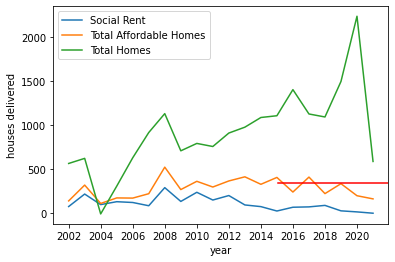

In [83]:
x = dcov['date']
y1 = dcov['SR']
y2 = dcov['AR']
y3 = dcov['DC_Total']
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.axhline(xmin=0.67,y=348,color='r')
plt.xlabel('year')
plt.ylabel('houses delivered')
plt.legend(['Social Rent','Total Affordable Homes','Total Homes'])

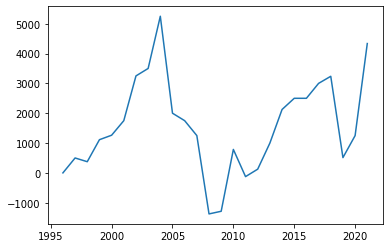

In [84]:
a = dcov4.groupby('year').mean().index
b = dcov4.groupby('year').mean().price_change
plt.plot(a,b)

It looks like as housing prices have risen, housing delivery has fallen. However, there is a lagged effect to housing supply's reaction to housing price changes. We can compare this by lagging house prices by a few periods

In [85]:
a = dcov4.groupby('year').mean().index
b = dcov4.groupby('year').mean().price_change_4

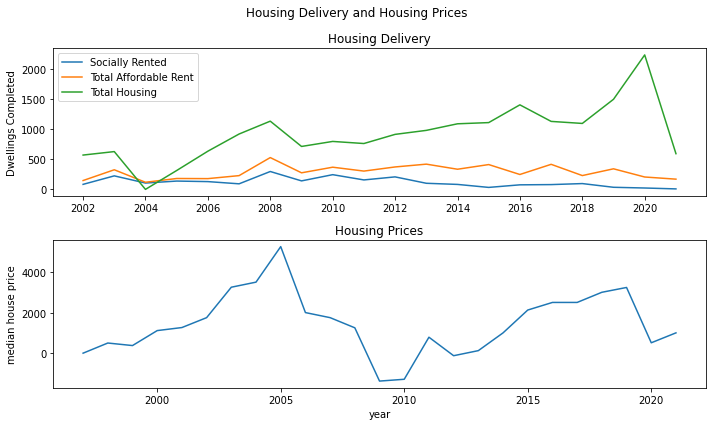

In [86]:
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(10,6))
ax[0].plot(x,y1)
ax[0].plot(x,y2)
ax[0].plot(x,y3)
ax[0].set(ylabel='Dwellings Completed',title='Housing Delivery')
ax[0].legend(['Socially Rented','Total Affordable Rent','Total Housing'])
ax[1].plot(a,b)
ax[1].set(ylabel='median house price',xlabel='year',title='Housing Prices')
fig.suptitle('Housing Delivery and Housing Prices')
fig.tight_layout()
plt.show()

In [62]:
from scipy.stats import pearsonr

0.37342090613825524 0.04209325619877667


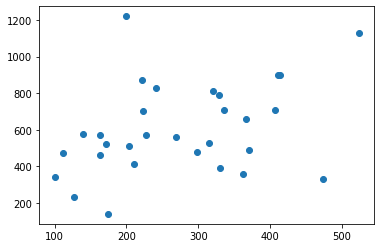

In [168]:
plt.scatter(dcov['AR'],dcov['DC_Total'])
corr, _ = pearsonr(dcov['AR'],dcov['DC_Total'])
print(corr,_)

Calculating correlation matrix between social rent percentage and affordable dwellings

In [140]:
np.cov(dcov['SR_p'],dcov['AR'])

array([[  784.16395987,  -817.32083549],
       [ -817.32083549, 12537.91264368]])

A negative relationship between number of total affordable dwellings completed and percentage socially rented homes delivered

Calculating covariance matrix between affordable homes and total dwellings completed

In [166]:
np.cov(dcov['AR'],dcov['DC_Total'])

array([[12537.91264368, 10417.3908046 ],
       [10417.3908046 , 62071.95402299]])

Text(0.5, 1.0, 'Affordable Delivered as Percentage of Total Dwellings Completed')

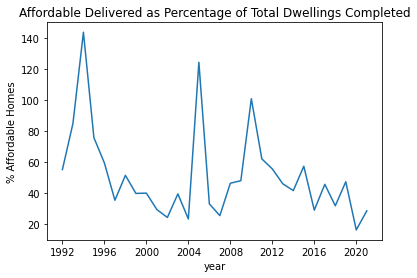

In [30]:
plt.plot(x,dcov['AR_p'])
plt.xlabel('year')
plt.ylabel('% Affordable Homes')
plt.title('Affordable Delivered as Percentage of Total Dwellings Completed')

In [89]:
np.average(dcov.loc[dcov['year']>2012,'AR_p'])

26.897547990424986

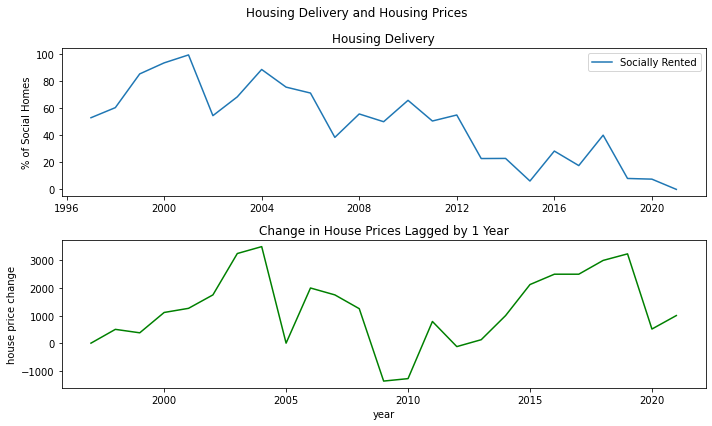

In [152]:
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(10,6))
ax[0].plot(x[5:],dcov['SR_p'][5:])
ax[0].set(ylabel='% of Social Homes',title='Housing Delivery')
ax[0].legend(['Socially Rented','Total Affordable Rent','Total Housing'])
ax[1].plot(a[2:],b[2:],color='green')
ax[1].set(ylabel='house price change',xlabel='year',title='Change in House Prices Lagged by 1 Year')
fig.suptitle('Housing Delivery and Housing Prices')
fig.tight_layout()
plt.show()

Checking covariance matrix for % of Socially Rented homes delivered against lagged median house price change

In [144]:
np.cov(dcov['SR_p'][5:],b[2:])

array([[ 8.32327340e+02, -4.86078135e+03],
       [-4.86078135e+03,  1.78559970e+06]])

In [145]:
b

year
1995            NaN
1996            NaN
1997       0.000000
1998     500.000000
1999     375.000000
2000    1112.500000
2001    1262.500000
2002    1750.000000
2003    3250.000000
2004    3500.000000
2005       0.000000
2006    2000.000000
2007    1750.000000
2008    1250.000000
2009   -1375.000000
2010   -1286.250000
2011     786.250000
2012    -125.000000
2013     125.000000
2014    1000.000000
2015    2125.000000
2016    2500.000000
2017    2500.000000
2018    3000.000000
2019    3237.500000
2020     511.875000
2021    1000.833333
Name: price_change_4, dtype: float64

In [40]:
dcov

,LA_code,LA,year,SR,AR,DC_Total,date,SR_p,AR_p
0,E08000026,Coventry,1992,102.0,127.0,230.0,1992-01-01,80.314961,55.217391
1,E08000026,Coventry,1993,231.0,331.0,390.0,1993-01-01,69.788520,84.871795
2,E08000026,Coventry,1994,378.0,474.0,330.0,1994-01-01,79.746835,143.636364
3,E08000026,Coventry,1995,271.0,371.0,490.0,1995-01-01,73.045822,75.714286
4,E08000026,Coventry,1996,203.0,315.0,530.0,1996-01-01,64.444444,59.433962
5,E08000026,Coventry,1997,86.0,163.0,460.0,1997-01-01,52.760736,35.434783
6,E08000026,Coventry,1998,127.0,211.0,410.0,1998-01-01,60.189573,51.463415
7,E08000026,Coventry,1999,193.0,227.0,570.0,1999-01-01,85.022026,39.824561
8,E08000026,Coventry,2000,190.0,204.0,510.0,2000-01-01,93.137255,40.000000
9,E08000026,Coventry,2001,99.0,100.0,340.0,2001-01-01,99.000000,29.411765


In [71]:
c = dcov_pop['date']
d = dcov_pop['pchange']

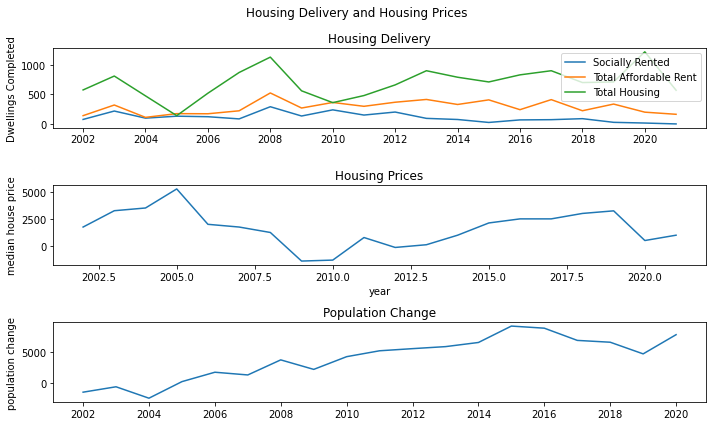

In [76]:
fig, ax = plt.subplots(nrows=3,ncols=1,figsize=(10,6))
ax[0].plot(x[10:],y1[10:])
ax[0].plot(x[10:],y2[10:])
ax[0].plot(x[10:],y3[10:])
ax[0].set(ylabel='Dwellings Completed',title='Housing Delivery')
ax[0].legend(['Socially Rented','Total Affordable Rent','Total Housing'])
ax[1].plot(a[7:],b[7:])
ax[1].set(ylabel='median house price',xlabel='year',title='Housing Prices')
ax[2].plot(c,d)
ax[2].set(ylabel='population change',title='Population Change')
fig.suptitle('Housing Delivery and Housing Prices')
fig.tight_layout()
plt.show()

In [75]:
a

Int64Index([1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
            2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
            2017, 2018, 2019, 2020, 2021],
           dtype='int64', name='year')

# Social Housing and Homelessness

In [ ]:
df_h = pd.read_excel('Homelessness 2009-2018 by LA.xlsx')